### Step 1: Importing The Libraries Required

In [126]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings('ignore')

### Step 2: Load and Inspect the Dataset

In [129]:
file_path = r'/diabetes_prediction_dataset.csv'  # Update with the correct file path
df = pd.read_csv(file_path)

# Displaying the first few rows of the dataset and its structure
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  


### Dataset Summary

In [132]:
print("\nDataset Information:")
print(df.info())

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB
None

Missing values in each column:
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes 

### Step 3: Data Preprocessing

In [135]:
# Convert categorical variables to numerical
df['gender'] = df['gender'].map({'Female': 0, 'Male': 1})
df['smoking_history'] = df['smoking_history'].map({'never': 0, 'No Info': 1, 'current': 2})

# Check for missing values before imputation
print("\nMissing values in each column before imputation:")
print(df.isna().sum())

# Impute missing values
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Check for missing values after imputation
print("\nMissing values in each column after imputation:")
print(df_imputed.isna().sum())


Missing values in each column before imputation:
gender                    18
age                        0
hypertension               0
heart_disease              0
smoking_history        19803
bmi                        0
HbA1c_level                0
blood_glucose_level        0
diabetes                   0
dtype: int64

Missing values in each column after imputation:
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


### Step 4: Feature Scaling

In [138]:
# Separate the target column
target_column = 'diabetes'

# Standardize the dataset
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df_imputed.drop(target_column, axis=1))

# Convert back to DataFrame
scaled_df = pd.DataFrame(scaled_df, columns=df_imputed.drop(target_column, axis=1).columns)
scaled_df[target_column] = df_imputed[target_column].values

### Step 5: Splitting the Data

In [141]:
# Split the data into training and testing sets
X = scaled_df.drop(target_column, axis=1)
y = scaled_df[target_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 6: Model Training and Evaluation

In [144]:
# Initialize the logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = metrics.accuracy_score(y_test, y_pred)
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
class_report = metrics.classification_report(y_test, y_pred)

# Print evaluation metrics
print("\nStep 6: Model Training and Evaluation")
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)



Step 6: Model Training and Evaluation
Accuracy: 0.96

Confusion Matrix:
[[18129   163]
 [  660  1048]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98     18292
         1.0       0.87      0.61      0.72      1708

    accuracy                           0.96     20000
   macro avg       0.92      0.80      0.85     20000
weighted avg       0.96      0.96      0.96     20000



### Step 7: Additional Evaluation Metrics

In [147]:
# Print individual evaluation metrics
print("\nStep 7: Additional Evaluation Metrics")
print(f"Accuracy: {accuracy:.2f}")
print("Precision: {:.2f}".format(metrics.precision_score(y_test, y_pred)))
print("Recall: {:.2f}".format(metrics.recall_score(y_test, y_pred)))


Step 7: Additional Evaluation Metrics
Accuracy: 0.96
Precision: 0.87
Recall: 0.61


### Step 8: ROC Curve and AUC

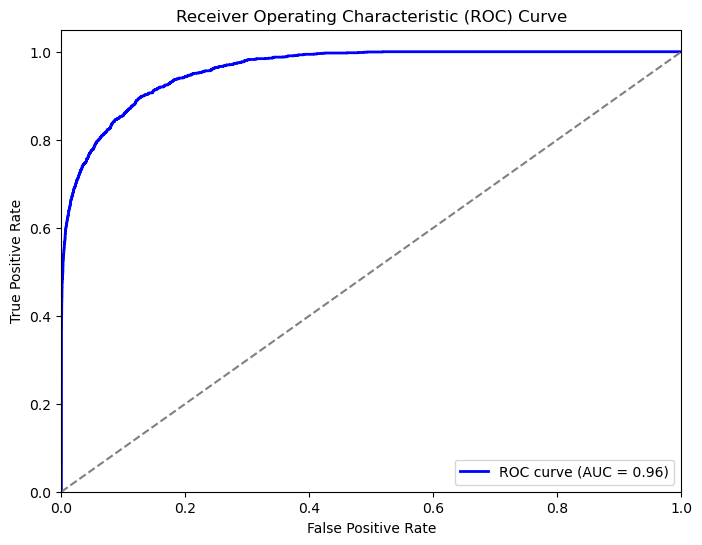


AUC: 0.96


In [150]:
# Predict probabilities
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print AUC
print("\nAUC: {:.2f}".format(auc))

In [152]:
print("Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)))
print("Precision: {:.2f}".format(metrics.precision_score(y_test, y_pred)))
print("Recall: {:.2f}".format(metrics.recall_score(y_test, y_pred)))

Accuracy: 0.96
Precision: 0.87
Recall: 0.61
